# <font color=900C3F>MACHINE LEARNGIN - Modelo de Regresión Lineal</font>

---

## <font color=#FF5733>REQUISITOS:</font>

> El objetivo de ese algoritmo es predecir el nivel de felicidad de los países elegidos para este proyecto de forma general.
> 
> Este proceso de modelagen lee un fichero en formato CSV donde ha sido tratado previamente los valores nulos y los outliers.
> 
> El CSV importado posee los datos de los siguiente países: - países nórdicos ('Dinamarca', 'Finlandia', 'Islandia', 'Noruega', 'Suecia') y 'España' y las encuestas contestadas por estos países en el período de 2015-2023.
>  
> Este proceso consiste en entrenar el algorítimo con datos historicos y presentar un resultado que evalua el grado de correlación entre los datos existentes en el conjunto de datos, verifica si ha podido predecir la felicidad satisfactoriamnte.
>
---

## <font color=#FF5733>Importar Librerías</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

## <font color=#FF5733>Importar CSVs</font>

In [2]:
# Definir la ruta donde se encuentra la carpeta y los CSVs que iremos trabajar
ruta_datos_preprocesados = '../data/ficheros_procesados/datos_preprocesados_limpios.csv'

# Rutas creadas para testes de otros CSVs
# ruta_datos_preprocesados = '../data/ficheros_procesados/datos_preprocesados.csv'
#ruta_datos_preprocesados = '../data/2019.csv'

# Creación del DataFrame
data = pd.read_csv(ruta_datos_preprocesados, delimiter=",", engine="python")
data.head()

,Year,Country,Region,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,2015,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
1,2015,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
2,2015,Finland,Western Europe,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351
3,2015,Sweden,Western Europe,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262
4,2016,Denmark,Western Europe,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171


In [3]:
data.columns

Index(['Year', 'Country', 'Region', 'Happiness Score',
       'Economy (GDP per Capita)', 'Social support',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity'],
      dtype='object')

In [4]:
# data.drop(['PAIS', 'REGION'], axis=1, inplace=True)

data.drop(['Year', 'Country', 'Region'], axis=1, inplace=True)
# data.drop(['Overall rank', 'Country or region'], axis=1, inplace=True)
data.head()

,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
1,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
2,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351
3,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262
4,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171


## <font color=#FF5733>Visualización - Gráfica(s)</font>

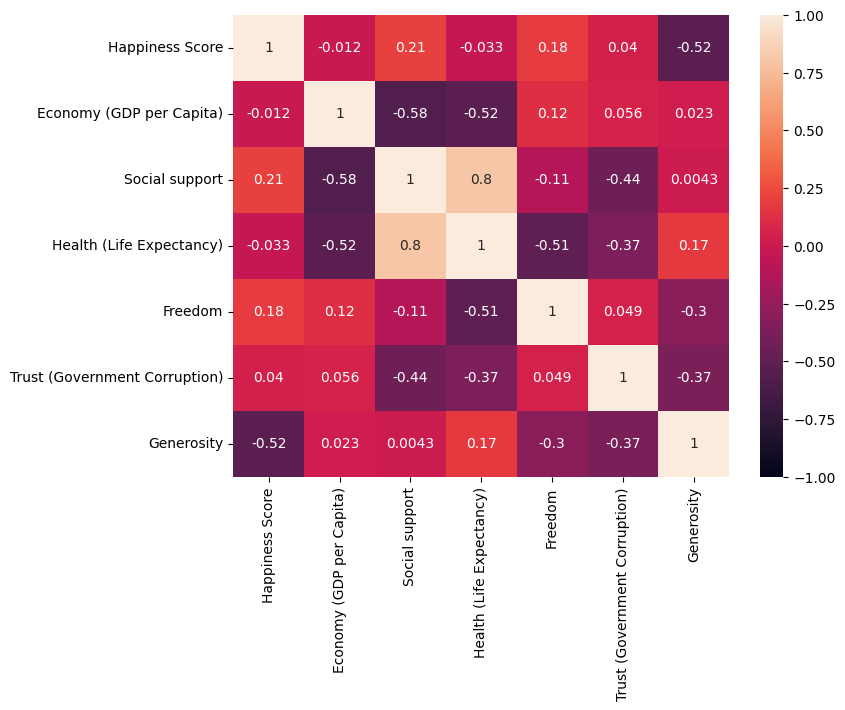

In [5]:
# Gráfica de todos los valores contendidos en el conjunto de datos importados a este cuaderno
# Esta gráfica no separa los países nórdicos de España, nos permite observar la situación global de estos países
# en relación a las a variables llevando en consideranción el período de 2015-2023.
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, vmin=-1.0, vmax=1.0)
plt.show()

Análisis Mapa de Calor:

El conjunto de datos analisado en el mapa de calor abrange todos los datos de 2015-2023 de todos los países nórdicos y España. Las correlaciones observadas en este  conjunto de datos son_

- ECONOMIA_PIB_PER_CAPITA -> LIBERTAD (fuerte correlación)
- PERCEPCION_CORRUPCION -> LIBERTAD (fuerte correlación)
- LIBERTAD -> APOYO_SOCIAL (Hay correlación pero poca)
- GENEROSIDAD -> LIBERTAD (Hay correlación pero poca)
- GENEROSIDAD -> APOYO_SOCIAL (Hay correlación pero poca)
- GENEROSIDAD -> SALUD_ESPERANZA_DE_VIDA (Hay correlación pero poca)


👨‍💻`¡Importante!`

> <font color="#DAF">Seria importante que en el cuaderno "3.0-analisis_descriptivo.ipynb" que existiera separadamente uma mapa de calor solamente para España y otro para el conjunto de países nóridicos que es el objetivo del proyecto, comparar estos países con España. Se podia tambien correlacionar cada uno de los países nórdicos con España. </font>

## <font color=#FF5733>Procesamiento</font> 

In [6]:
# Verificar si hay valors nulos
data.isnull().sum()

Happiness Score                  0
Economy (GDP per Capita)         0
Social support                   0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64

In [7]:
# Verificar los tipos de datos
data.dtypes

Happiness Score                  float64
Economy (GDP per Capita)         float64
Social support                   float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
dtype: object

In [8]:
# # Separar los datos para Escalar (Incluir en el CSV)
y = data['Happiness Score']
X = data.drop('Happiness Score', axis=1)


In [9]:
y

0     7.5270
1     7.5220
2     7.4060
3     7.3640
4     7.5260
5     7.4980
6     7.4130
7     7.2910
8     7.4965
9     7.4965
10    7.4965
11    7.4965
12    7.4965
13    7.4965
14    7.6320
15    7.5940
16    7.5550
17    7.4950
18    7.3140
19    7.7690
20    7.6000
21    7.5540
22    7.4940
23    7.3430
24    7.4965
25    7.4965
26    7.4965
27    7.4965
28    7.4965
29    7.4965
30    7.8420
31    7.6200
32    7.5540
33    7.3920
34    7.3630
Name: Happiness Score, dtype: float64

In [10]:
X

,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1.325480,1.360580,0.874640,0.64938,0.48357,0.34139
1,1.459000,1.330950,0.885210,0.66973,0.36503,0.34699
2,1.290250,1.318260,0.889110,0.64169,0.41372,0.23351
3,1.331710,1.289070,0.910870,0.65980,0.43844,0.36262
4,1.441780,1.163740,0.795040,0.57941,0.44453,0.36171
5,1.577440,1.126900,0.795790,0.59609,0.35776,0.37895
6,1.405980,1.134640,0.810910,0.57104,0.41004,0.25492
7,1.451810,1.087640,0.831210,0.58218,0.40867,0.38254
8,1.448905,1.325475,0.828605,0.65940,0.39300,0.24650
9,1.448905,1.325475,0.828605,0.65940,0.39300,0.24650


In [11]:
scaler = MinMaxScaler()
# Transforma X en la version escalada de si mismo y luego pasamo a la X original
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,0.122671,0.513024,0.465645,0.593665,0.996104,0.840837
1,0.587590,0.462113,0.502474,0.747878,0.673106,0.862497
2,0.000000,0.440309,0.516063,0.535390,0.805777,0.423571
3,0.144364,0.390155,0.591882,0.672628,0.873134,0.922952
4,0.527630,0.174811,0.188293,0.063428,0.889728,0.919432
5,1.000000,0.111512,0.190906,0.189830,0.653297,0.986114
6,0.402974,0.124811,0.243589,0.000000,0.795749,0.506382
7,0.562554,0.044055,0.314321,0.084420,0.792016,1.000000
8,0.552439,0.452706,0.305244,0.669597,0.749319,0.473814
9,0.552439,0.452706,0.305244,0.669597,0.749319,0.473814


### <font color=#186a3b>--> Separar los datos de prueba y entrenamiento </font>

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

## <font color=#FF5733>Entrenamiento</font>

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## <font color=#FF5733>Resultado</font>

In [14]:
# Ahora toca imprimir para ver los resultados

print(f'Regression R2: {model.score(X_test, y_test)}')

Regression R2: 0.4026962605548867
